# Correlation Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# 데이터 생성 (예: 공부 시간과 시험 점수)
hours_studied = np.array([1, 2, 3, 4, 5, 6, 7, 8])
exam_scores = np.array([65, 70, 75, 80, 85, 85, 90, 95])

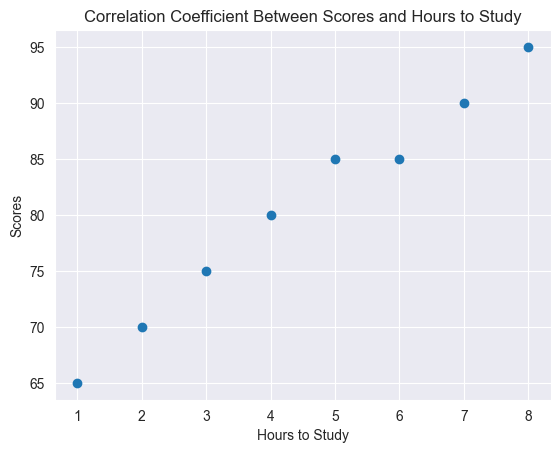

In [2]:
# 데이터 분포 시각화
plt.scatter(hours_studied, exam_scores)
plt.xlabel("Hours to Study")
plt.ylabel("Scores")
plt.title("Correlation Coefficient Between Scores and Hours to Study")
plt.grid(True)
plt.show()

In [3]:
# 피어슨 상관 계수 계산
# np.corrcoef(x, y)
# - 두 변수 사이의 피어슨 상관계수(Pearson correlation coefficient)를 계산하는 함수
# - 입력된 변수의 수에 따라 n×n 크기의 상관계수 행렬 반환
# - 2개의 변수를 입력할 경우: 2×2 행렬 반환
#     - [0,0]과 [1,1]은 항상 1 (각 변수의 자기 자신과의 상관계수)
#     - [0,1]과 [1,0]은 두 변수 간의 상관계수 (동일한 값)
#
# - 여러 변수를 입력할 경우: 변수 수 × 변수 수 크기의 행렬 반환
# - 2차원 배열 하나를 입력할 경우: 행의 수만큼의 크기를 가진 행렬 반환

correlation_matrix = np.corrcoef(hours_studied, exam_scores)
correlation = correlation_matrix[0][1]
print(type(correlation_matrix))
correlation_matrix

<class 'numpy.ndarray'>


array([[1.        , 0.99068013],
       [0.99068013, 1.        ]])

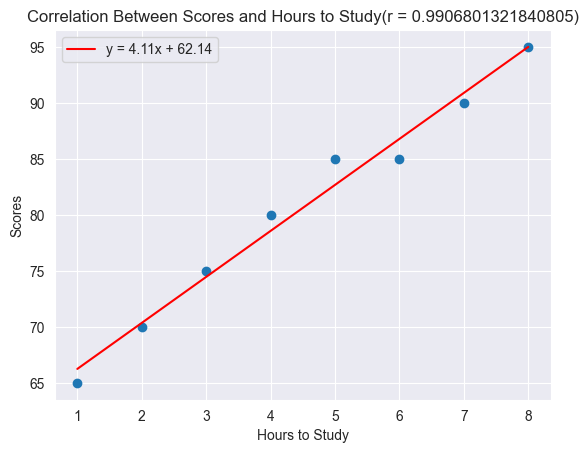

In [4]:
# 추세선 시각화

# np.polyfit(x, y, 차수)
# - 데이터에 가장 잘 맞는 다항식의 계수를 반환합니다
# - 반환된 계수는 기울기(slope)와 y절편(intercept)
# => 차수를 1로 주므로, 1차식안 y = slope * x + intercept

# 데이터 분포
plt.scatter(hours_studied, exam_scores)

slope, intercept = np.polyfit(hours_studied, exam_scores, 1)
trend_line = slope * hours_studied + intercept  # 추세선 식
# 추세선
plt.plot(hours_studied, trend_line, "r-", label=f"y = {slope:.2f}x + {intercept:.2f}")

plt.xlabel("Hours to Study")
plt.ylabel("Scores")
plt.title(f"Correlation Between Scores and Hours to Study(r = {correlation})")
plt.legend()
plt.grid(True)
plt.show()

# 보스턴 주택 가격 데이터셋(1970)으로 선형회귀 실습
> 보스턴 주택 가격 데이터셋은 윤리적인 문제가 있어서,
> sklearn 의 특정 버전부터는 데이터를 가져오는 방식이 바뀜
## 각 열 데이터 내용
- CRIM: 지역별 범죄율
- ZN: 25,000 평방피트 이상의 주거 용지 비율
- INDUS: 비소매 상업 지역 비율
- CHAS: 찰스강 경계에 위치 여부 (1=강 경계, 0=아님)
- NOX: 일산화질소 농도
- RM: 주택당 평균 방 개수
- AGE: 1940년 이전에 건축된 주택 비율
- DIS: 보스턴 5대 고용 센터까지의 가중 거리
- RAD: 고속도로 접근성 지수
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역별 학생/교사 비율
- B: 1000(Bk - 0.63)^2, Bk는 지역별 흑인 비율 (윤리적 문제가 있는 변수)
- LSTAT: 하위 계층의 비율(%)
- MEDV: 주택 가격(중앙값, 단위: $1,000)

## 보스턴 주택 가격 데이터셋 대체제
- 캘리포니아 주택 가격 데이터셋(1990)
    - `klearn.datasets.fetch_california_housing`
- Ames 주택 데이터셋(2006~2010):
    - `klearn.datasets.fetch_openml`

In [5]:
# `sklearn.datasets.load_boston` 은,
# 윤리적인 문제로 sklearn 1.2 버전 이후 부터는 지원하지 않음

# 보스턴 주택 가격을 받아오고 싶으면 아래와 같이 가져 와야함.
from sklearn.datasets import fetch_openml


boston = fetch_openml(name="boston", version=1, as_frame=True)

# 데이터프레임 생성
df = boston.frame

In [6]:
# 상관 관계 행렬 계산
correlation_matrix = df.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


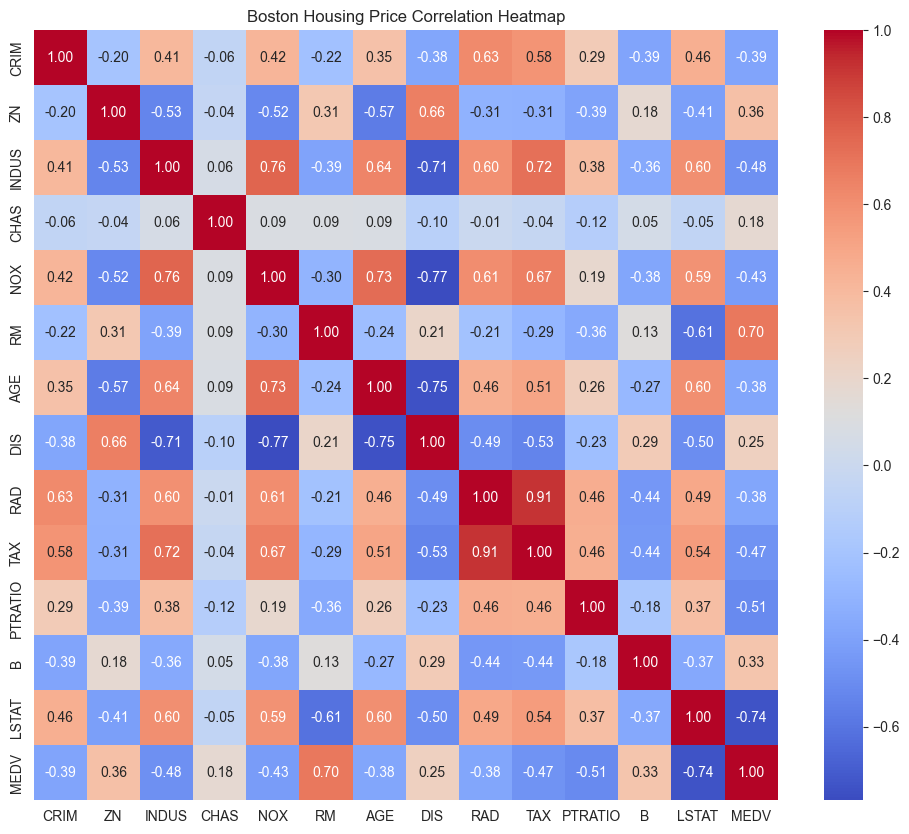

In [7]:
import seaborn as sns


# 히트맵으로 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Boston Housing Price Correlation Heatmap")
plt.show()

## Error Metrics

In [8]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 테스트 용으로 가짜 예측 값
y_pred = np.arange(1, 11)
# 테스트 용으로 가짜 훈련용 데이터 값
y_test = np.linspace(1, 12, 10)
y_test

array([ 1.        ,  2.22222222,  3.44444444,  4.66666667,  5.88888889,
        7.11111111,  8.33333333,  9.55555556, 10.77777778, 12.        ])

In [9]:
# 오차 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 1.0000000000000004
MSE: 1.4074074074074086
RMSE: 1.1863420280034795
R²: 0.8858001502629601


# Gradient Descent

In [10]:
import numpy as np


# 데이터
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# 초기 파라미터
w = 0.0
b = 0.0

# 하이퍼파라미터
learning_rate = 0.01
iterations = 1000

# 경사하강법 구현
for i in range(iterations):
    # 예측값 계산
    y_pred = w * X + b

    # 연쇄 법칙을 적용한 그래디언트 계산
    # 손실(Loss) 함수: 평균 제곱 오차 (MSE) = (1/2m) Σ((y_pred - y)^2)
    # ∂L/∂w = ∂L/∂y_pred * ∂y_pred/∂w
    # - ∂L/∂y_pred: 손실 함수의 y_pred에 대한 미분. 이는 오차(y_pred - y)의 평균입니다.
    # - ∂y_pred/∂w: y_pred = w * X + b에서 w에 대한 미분 결과는 X입니다.
    # 따라서, ∂L/∂w = 평균((y_pred - y) * X)
    dw = np.mean(X * (y_pred - y))

    # ∂L/∂b = ∂L/∂y_pred * ∂y_pred/∂b
    # - ∂L/∂y_pred와 동일한 값: 오차(y_pred - y)의 평균
    # - ∂y_pred/∂b: y_pred = w * X + b에서 b에 대한 미분 결과는 1입니다.
    # 따라서, ∂L/∂b = 평균(y_pred - y)
    db = np.mean(y_pred - y)

    # 파라미터 업데이트
    # 각 파라미터에 대해 ∂L/∂w와 ∂L/∂b 값을 학습률(learning_rate)로 조정하여 업데이트
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # 손실 계산 (MSE)
    # 손실(Loss): (1/2m) Σ((y_pred - y)^2)
    # 여기서 /2는 미분 과정에서 상쇄되므로, 손실 자체 계산시 사용하지 않아도 무방
    loss = np.mean((y - y_pred) ** 2) / 2

    # 손실 값을 특정 반복마다 출력
    if i % 100 == 0:
        print(f"반복 {i}, 손실: {loss:.4f}, w: {w:.4f}, b: {b:.4f}")

# 최종 결과 출력
print(f"최종 결과: w: {w}, b: {b}")
print(f"선형 회귀 모델: y = {w}*x + {b}")

반복 0, 손실: 22.0000, w: 0.2200, b: 0.0600
반복 100, 손실: 0.0172, w: 1.8799, b: 0.4337
반복 200, 손실: 0.0122, w: 1.8986, b: 0.3662
반복 300, 손실: 0.0087, w: 1.9144, b: 0.3092
반복 400, 손실: 0.0062, w: 1.9277, b: 0.2611
반복 500, 손실: 0.0044, w: 1.9389, b: 0.2204
반복 600, 손실: 0.0032, w: 1.9484, b: 0.1861
반복 700, 손실: 0.0023, w: 1.9565, b: 0.1571
반복 800, 손실: 0.0016, w: 1.9632, b: 0.1327
반복 900, 손실: 0.0011, w: 1.9690, b: 0.1120
최종 결과: w: 1.9737548787242036, b: 0.09475321533750963
선형 회귀 모델: y = 1.9737548787242036*x + 0.09475321533750963


# 실제로 머신러닝의 Linear Regression 과정을 해보기

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# 보스턴 주택 가격을 선형 회귀 모델을 만들어 예측해보기
boston = fetch_openml(name="boston", version=1, as_frame=True)

# 데이터프레임 보기(MEDV 가 주택 가격)
boston.frame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [12]:
# MEDV 와 상관 관계가 큰 feature 찾기
boston.frame.corr()["MEDV"].sort_values(ascending=False)
# RM(방 개수)이 상관 계수가 가장 큼!

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [13]:
# 목표 변수 y 는 주택 가격으로, 특징 변수 X 를 방 갯수로
X = boston.frame[["RM"]]
y = boston.frame[["MEDV"]]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)  # 훈련 데이터(80%):테스트 데이터(20%)

In [14]:
# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# 예측
y_pred = model.predict(X_test)

# 실제 가격과 얼마나 오차가 있는지 계산

# 예측값과 실제값의 차이(절대값)의 평균
mae = mean_absolute_error(y_test, y_pred)

# 예측값과 실제값 차이의 제곱의 평균
mse = mean_squared_error(y_test, y_pred)

# MSE의 제곱근으로, 원래 타겟 변수와 같은 단위로 변환한 값
rmse = np.sqrt(mse)

# 모델이 데이터의 분산을 얼마나 설명하는지 나타내는 지표
r2 = r2_score(y_test, y_pred)

print(f"MAE (평균 절대 오차): {mae}")
print(f"MSE (평균 제곱 오차): {mse}")
print(f"RMSE (평균 제곱근 오차): {rmse}")
print(f"R² (결정 계수): {r2}")

# R² 값이 0.3918로 높지 않은 것으로 보아,
# RM 변수만으로는 주택 가격을 완전히 예측하기 어렵다.
# RMSE 값이 7.2953으로, 실제 주택 가격과 평균적으로 약 7천 달러 정도 차이가 난다.

MAE (평균 절대 오차): 3.9893600510732754
MSE (평균 제곱 오차): 29.34025853650342
RMSE (평균 제곱근 오차): 5.416664890548742
R² (결정 계수): 0.6097838651788217


In [16]:
# 결과 출력
print(f"가중치(w): {model.coef_[0][0]:.3f}")
print(f"편향(b): {model.intercept_[0]:.3f}")

가중치(w): 8.855
편향(b): -33.024


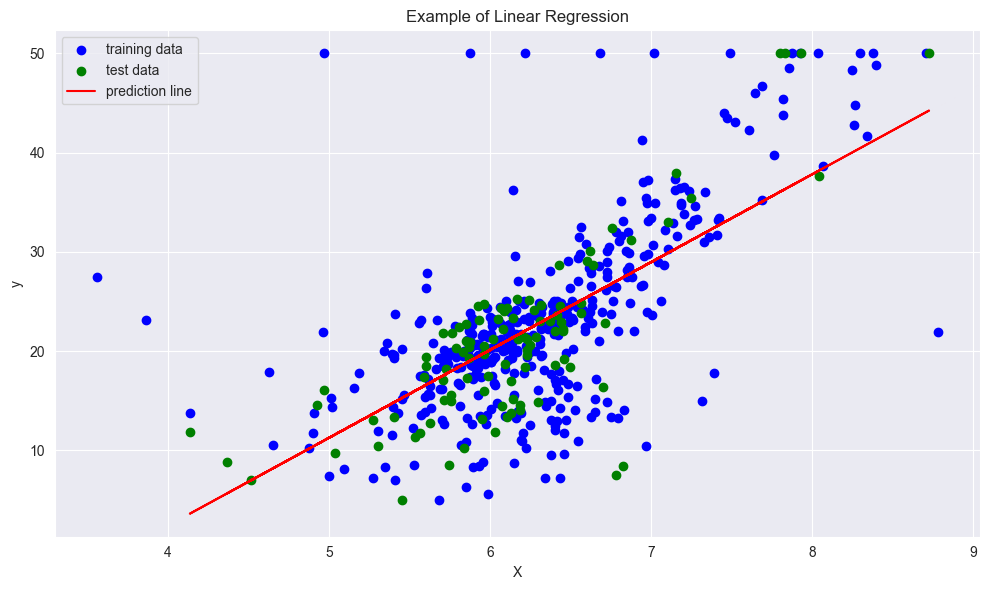

In [17]:
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", label="training data")
plt.scatter(X_test, y_test, color="green", label="test data")
plt.plot(X_test, y_pred, color="red", label="prediction line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Example of Linear Regression")
plt.tight_layout()
plt.show()